In [49]:
### Data Analysis and Manipulation 
import pandas as pd 
import numpy as np
### Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set() ## this is for styling
### Data Standardization and Modeling with K-Means and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [106]:
df= pd.read_csv('Mall Customers (raw data).csv', index_col = 0)

In [107]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [108]:
df['gender'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)

In [53]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [54]:
df.describe()

,gender,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          200 non-null    int64
 1   age             200 non-null    int64
 2   annual_income   200 non-null    int64
 3   spending_score  200 non-null    int64
dtypes: int64(4)
memory usage: 7.8 KB


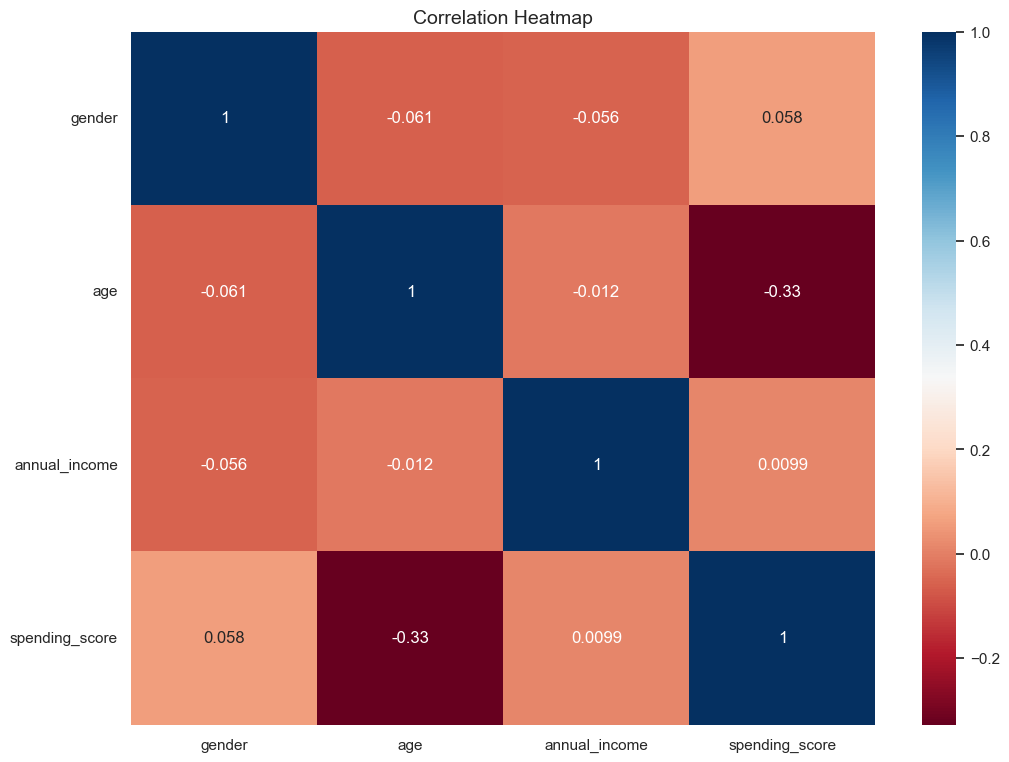

In [56]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

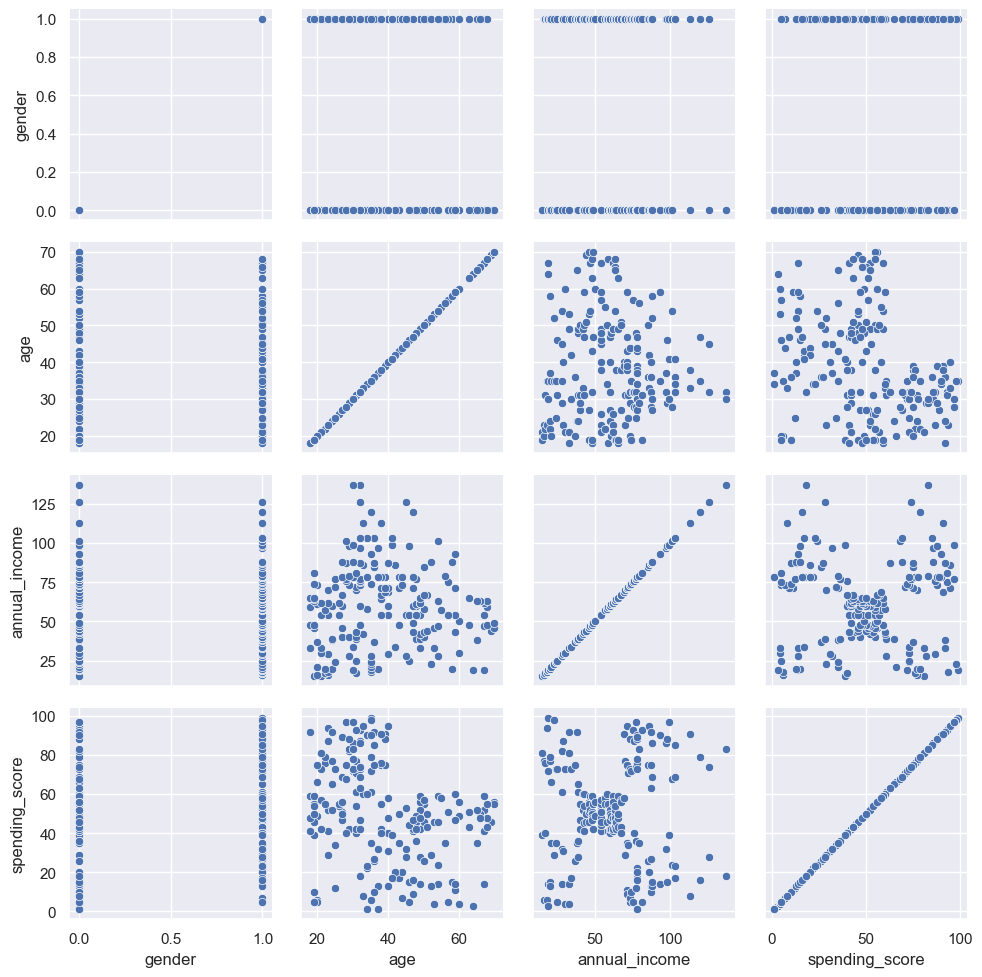

In [57]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

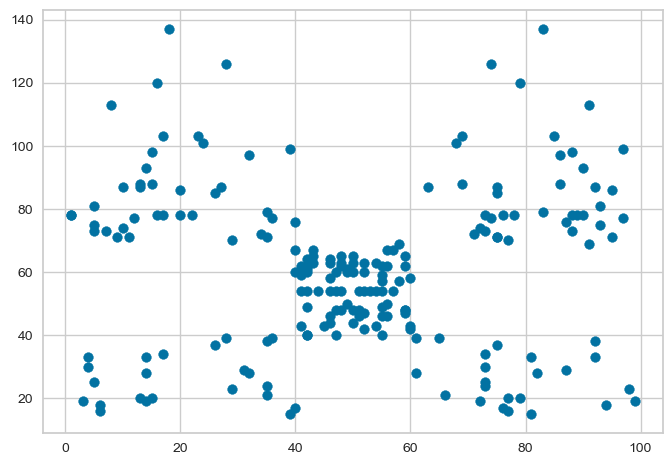

In [104]:
plt.scatter(df['spending_score'],df['annual_income'])

In [109]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [110]:
df_std = pd.DataFrame(data = df_std,columns = df.columns)

In [111]:
X = np.array(df_std[["gender","age","annual_income","spending_score"]])
X

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [ 0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [-1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [-1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [ 0.88640526, -0.

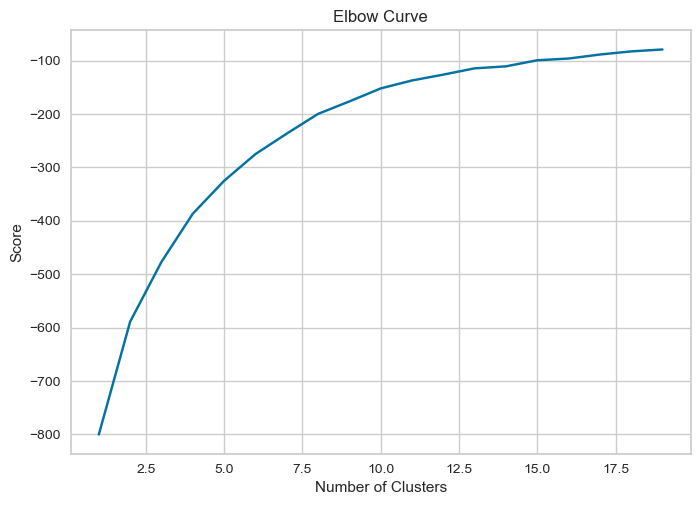

In [112]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

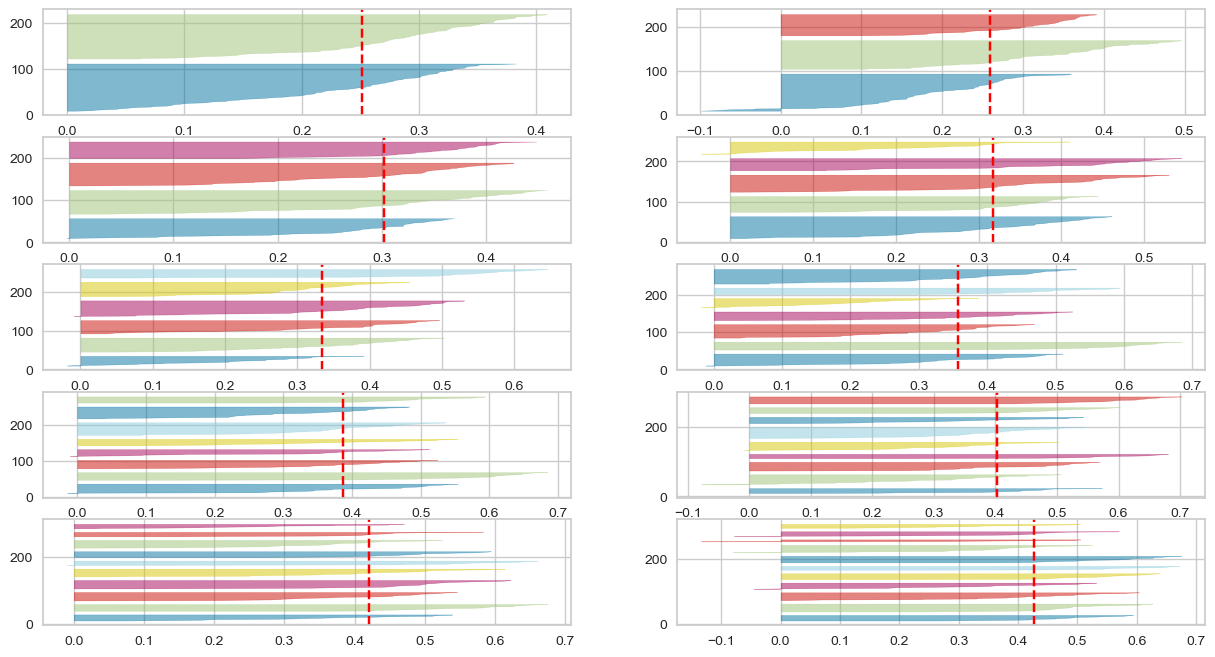

In [62]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(5, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

In [113]:
kmeans = KMeans(n_clusters=9).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.88640526  0.41265847  1.21277    -1.11029664]
 [ 0.88640526 -0.47793198  0.97284787  1.22158511]
 [-1.12815215  1.33075947 -0.48486081 -0.42786906]
 [ 0.88640526 -0.74039302 -0.34835966 -0.27822119]
 [-1.12815215 -1.02205127 -0.75821082  0.43783969]
 [ 0.88640526  0.98505218 -0.49907107 -0.30892551]
 [-1.12815215 -0.39989994  1.01344075  1.26040667]
 [-1.12815215 -0.02700694  0.96701244 -1.39716754]
 [ 0.88640526 -0.96084556 -1.33087991  1.17778643]]


In [114]:
df['Segment'] = kmeans.labels_

In [115]:
df_segm_analysis = df.groupby(['Segment']).mean()
df_segm_analysis

,gender,age,annual_income,spending_score
Segment,,,,
0,1.0,44.600000,92.333333,21.600000
1,1.0,32.190476,86.047619,81.666667
2,0.0,57.392857,47.857143,39.178571
3,1.0,28.533333,51.433333,43.033333
4,0.0,24.608696,40.695652,61.478261
5,1.0,52.575758,47.484848,42.242424
6,0.0,33.277778,87.111111,82.666667
7,0.0,38.473684,85.894737,14.210526
8,1.0,25.461538,25.692308,80.538462


In [116]:
df['Segment'] = df['Segment'].astype(str)

In [67]:
# Getting the values and plotting it

figura = px.scatter(df,x='annual_income',y='age',color='Segment',symbol='Segment')
figura.show()

In [68]:
# Getting the values and plotting it

figura = px.scatter(df,x='spending_score',y='age',color='Segment')
figura.show()

In [69]:
figura = px.scatter(df,x='spending_score',y='annual_income',color='Segment')
figura.show()

In [117]:
import plotly.express as px
fig = px.scatter_3d(df, x='age', y='annual_income', z='spending_score',
              color='Segment')
fig.show()

In [70]:
# Solo usando spending_score y annual_income
df_2 = df[['spending_score','annual_income']].copy()

In [71]:
scaler = StandardScaler()
df2_std = scaler.fit_transform(df_2)

df2_std = pd.DataFrame(data = df2_std,columns = df_2.columns)

In [72]:
X2 = np.array(df2_std[["annual_income","spending_score"]])
X2

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

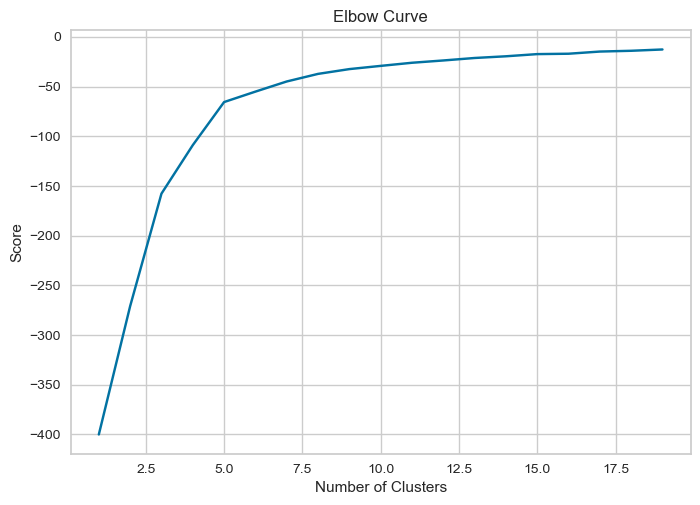

In [73]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X2).score(X2) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [74]:
kmeans = KMeans(n_clusters=5).fit(X2)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.05500302 -1.28443907]
 [-1.32954532  1.13217788]
 [-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.30751869 -1.13696536]]


In [75]:
df_2['Segment'] = kmeans.labels_
df_2['age'] = df['age']
df_2['gender'] = df['gender']

df2_segm_analysis = df_2.groupby(['Segment']).mean()
df2_segm_analysis

,spending_score,annual_income,age,gender
Segment,,,,
0,17.114286,88.200000,41.114286,0.457143
1,79.363636,25.727273,25.272727,0.590909
2,49.518519,55.296296,42.716049,0.592593
3,82.128205,86.538462,32.692308,0.538462
4,20.913043,26.304348,45.217391,0.608696


In [76]:
df_2['Segment'] = df_2['Segment'].astype(str)

figura = px.scatter(df_2,x='spending_score',y='annual_income',color='Segment')
figura.show()

In [77]:
df_2['Segment'] = df_2['Segment'].astype(str)

figura = px.scatter(df_2,x='spending_score',y='annual_income',color='Segment',size='age')
figura.show()

In [81]:
import plotly.express as px
fig = px.scatter_3d(df_2, x='age', y='annual_income', z='spending_score',
              color='Segment')
fig.show()

In [84]:
# Modelo con 3 variable
df_3 = df[['age','spending_score','annual_income']].copy()

In [85]:
scaler = StandardScaler()
df3_std = scaler.fit_transform(df_3)

df3_std = pd.DataFrame(data = df3_std,columns = df_3.columns)

In [88]:
X3 = np.array(df3_std[["age","annual_income","spending_score"]])
X3

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

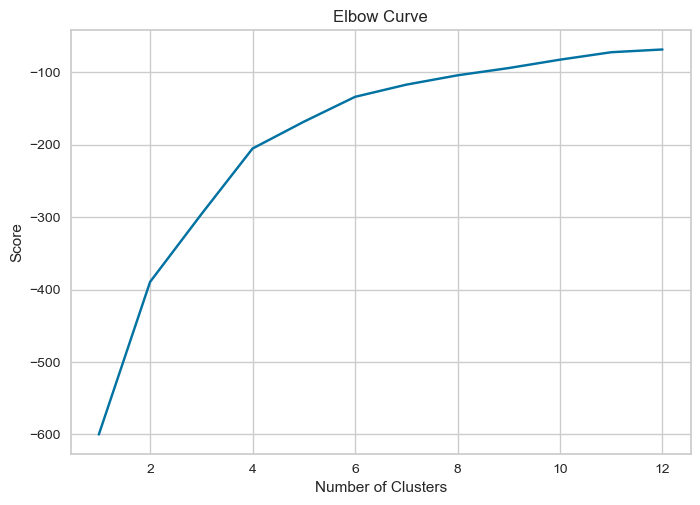

In [95]:
Nc = range(1, 13)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X3).score(X3) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [119]:
kmeans = KMeans(n_clusters=6).fit(X3)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.87309844 -0.11378508 -0.09358039]
 [ 1.25472096 -0.24021294 -0.04399777]
 [-0.44191719  0.99158305  1.23950275]
 [-0.97602698 -1.32549704  1.0371827 ]
 [ 0.22171558  1.08322527 -1.29005223]
 [ 0.47895722 -1.30822992 -1.19644353]]


In [126]:
df_3['Segment'] = kmeans.labels_
df_3['gender'] =df['gender']

df3_segm_analysis = df_3.groupby(['Segment']).mean()
df3_segm_analysis

,age,spending_score,annual_income,gender
Segment,,,,
0,26.684211,47.789474,57.578947,0.631579
1,56.333333,49.066667,54.266667,0.577778
2,32.692308,82.128205,86.538462,0.538462
3,25.250000,76.916667,25.833333,0.583333
4,41.939394,16.969697,88.939394,0.424242
5,45.523810,19.380952,26.285714,0.619048


In [101]:
import plotly.express as px
fig = px.scatter_3d(df_3, x='age', y='annual_income', z='spending_score',
              color='Segment')
fig.show()

In [102]:
df_3['Segment'] = df_3['Segment'].astype(str)

figura = px.scatter(df_3,x='spending_score',y='annual_income',color='Segment',size='age')
figura.show()